# tweezers
### Python library for twitter data analysis.
Tweezers leverages the power of *requests* and *pandas* to provide a simple interface to scrape Twitter data and shape it into easy-to-analyse lists, dataframes, and metadata.

In [1]:
import tweezers

#### First create a connection to the API with twitter credentials

In [2]:
# Twitter auth credentials loaded from a locally stored json file.
import json
credentials = json.load(open("../../credentials/twitter_credentials.json"))

consumer_key = credentials['consumer_key']
consumer_secret = credentials['consumer_secret']
access_token = credentials['access_token']
access_token_secret = credentials['access_token_secret']

auth = tweezers.tweezer_auth(consumer_key, 
                             consumer_secret,
                             access_token,
                             access_token_secret)

Verify the credentials have successfully connected with Twitter

In [3]:
auth.verify()

'Congratulations! Your credentials are valid.'

#### Now perform a search. Simply specify the number of tweets!

In [4]:
my_search = tweezers.search(tweezer_auth = auth,
                            total = 1000,
                            search_term = "bitcoin")

1000 tweets requested, 1000 tweets returned


The search object create provides access to a number of methods for retrieving lists, dataframes and search metadata.

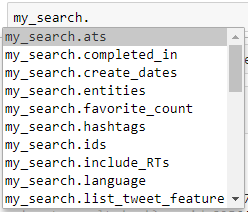

In [5]:
from IPython.display import Image
Image("./images/search.methods.PNG")

Get a list of the tweet features returned by the search:

In [6]:
my_search.tweet_features

['created_at',
 'id',
 'id_str',
 'text',
 'truncated',
 'entities',
 'metadata',
 'source',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'in_reply_to_screen_name',
 'user',
 'geo',
 'coordinates',
 'place',
 'contributors',
 'is_quote_status',
 'retweet_count',
 'favorite_count',
 'favorited',
 'retweeted',
 'possibly_sensitive',
 'lang']

Choose a feature and get a list of that feature for every tweet returned:

In [7]:
my_search.list_tweet_feature(feature = "created_at")[:10]

['Fri Sep 08 12:53:46 +0000 2017',
 'Fri Sep 08 12:53:46 +0000 2017',
 'Fri Sep 08 12:53:36 +0000 2017',
 'Fri Sep 08 12:53:30 +0000 2017',
 'Fri Sep 08 12:53:23 +0000 2017',
 'Fri Sep 08 12:53:22 +0000 2017',
 'Fri Sep 08 12:53:13 +0000 2017',
 'Fri Sep 08 12:53:13 +0000 2017',
 'Fri Sep 08 12:53:11 +0000 2017',
 'Fri Sep 08 12:53:03 +0000 2017']

Get a dataframe summary of the number of users, mentions, hashtags, or URLs in the tweets returned by the search.

In [8]:
my_search.users_df().head()

,users,count
0,uasociolog,16
1,StakepoolCom,14
2,SportsbookBTC,12
3,ewpaisley,11
4,lionfxpartners,11


In [9]:
my_search.mentioned_df().head()

,mentions,count
0,@YouTube,12
1,@GenesisMining,8
2,@blockchainbiz,6
3,@bitcoin,4
4,@CoinDesk,4


In [10]:
my_search.hashtags_df().head()

,hashtags,count
0,Bitcoin,135
1,bitcoin,123
2,cryptocurrency,24
3,altcoins,12
4,GoogleAlerts,11


In [11]:
my_search.urls_df().head()

,url,count
0,https://t.co/UTq4p9bjSP,8
1,https://t.co/WRyzFPScK9,7
2,https://t.co/AppDqDUeGU,7
3,https://t.co/0I4IIflkwI,3
4,https://t.co/0ScptZxYqG,3


Get an estimate of the average tweet frequency for the search term:

In [12]:
my_search.time_per_tweet

datetime.timedelta(0, 3, 398000)

Get an estimate of the number of tweets per week about the search term:

In [13]:
my_search.tweets_per_week

201600

Get a list of the text of all the tweets:

In [14]:
my_search.tweets[:10]

['@rBitcoins: Swiss town of Chiasso to accept bitcoin to settle tax bills. https://t.co/xDv9mdlsTC',
 '#Bitcoin #gold exchange @Vaultoro receives 7 figure investment from #fintech accelerator @the_finlab #singapore |… https://t.co/JIi9LhtLPH',
 'Tokyo-based GMO Internet Group Plans to Spend $320M on Bitcoin Mining Busines https://t.co/pbUBf7sijR',
 'Precio actual Bitcoin https://t.co/yabfgsW0qn',
 "It's been 4 years and no burst yet. The Bitcoin Bubble and the Future of Currency (2013) https://t.co/IalkOg6nNS",
 'Decentralized Search Engine Explained https://t.co/52c3FYvMSD #Bitcoin #Altcoin',
 'Tokyo-based GMO Internet Group Plans to Spend $320M on Bitcoin Mining Busines: https://t.co/AhPvLdIta4 #bitcoin #btc',
 'You want a Lamborghini, sip martinis, look hot in a bikini, ya betta #work b*%ch 👸🏻🙌 #crypto #bitcoin #FridayFeeling',
 'Bitcoin is a bit like the dollar, but it’s still a ‘speculative bubble,’ says Howard Marks https://t.co/1X5fs7kktr  @VicRek',
 '@alanz1201 @waikiat_1104 Ho

Doing some Natural Language Processing? Get the same list, but with URLs, hashtag symbols, and @ symbols removed:

In [15]:
my_search.stripped_tweets[:10]

['rBitcoins: Swiss town of Chiasso to accept bitcoin to settle tax bills.',
 'Bitcoin gold exchange Vaultoro receives 7 figure investment from fintech accelerator the_finlab singapore |…',
 'Tokyo-based GMO Internet Group Plans to Spend $320M on Bitcoin Mining Busines',
 'Precio actual Bitcoin',
 "It's been 4 years and no burst yet. The Bitcoin Bubble and the Future of Currency (2013)",
 'Decentralized Search Engine Explained Bitcoin Altcoin',
 'Tokyo-based GMO Internet Group Plans to Spend $320M on Bitcoin Mining Busines: bitcoin btc',
 'You want a Lamborghini, sip martinis, look hot in a bikini, ya betta work b*%ch 👸🏻🙌 crypto bitcoin FridayFeeling',
 'Bitcoin is a bit like the dollar, but it’s still a ‘speculative bubble,’ says Howard Marks VicRek',
 'alanz1201 waikiat_1104 Hodl is reserved only for bitcoin.. Everything else I dump to make more bitcoin.']

### NEW! Integrated sentiment analysis with <a href="https://github.com/sloria/TextBlob">TextBlob</a>
Get a score for the average subjectivity and polarity of the tweets:

In [16]:
my_search.polarity_score

0.086295275135743879

In [17]:
my_search.subjectivity_score

0.24988760387760389

### Or just get everything in a pandas dataframe ready for analysis

In [18]:
my_search.pandas_df().head()

,ats,created_at,favorite_count,hashtags,id,polarity,retweet_count,stripped_tweet,subjectivity,tweet,urls,user
0,[@rBitcoins],Fri Sep 08 12:53:46 +0000 2017,0,[],906138494397009920,0.0,0,rBitcoins: Swiss town of Chiasso to accept bit...,0.000,@rBitcoins: Swiss town of Chiasso to accept bi...,[https://t.co/xDv9mdlsTC],Cryptow1re
1,"[@Vaultoro, @the]",Fri Sep 08 12:53:46 +0000 2017,0,"[Bitcoin, gold, fintech, singapore]",906138492572499970,0.0,0,Bitcoin gold exchange Vaultoro receives 7 figu...,0.000,#Bitcoin #gold exchange @Vaultoro receives 7 f...,[https://t.co/JIi9LhtLPH],crypto_ninjas
2,[],Fri Sep 08 12:53:36 +0000 2017,1,[],906138448590987265,0.0,1,Tokyo-based GMO Internet Group Plans to Spend ...,0.000,Tokyo-based GMO Internet Group Plans to Spend ...,[https://t.co/pbUBf7sijR],RealTimeCrypto
3,[],Fri Sep 08 12:53:30 +0000 2017,0,[],906138425409110016,0.0,0,Precio actual Bitcoin,0.100,Precio actual Bitcoin https://t.co/yabfgsW0qn,[https://t.co/yabfgsW0qn],CryptoTrading_1
4,[],Fri Sep 08 12:53:23 +0000 2017,0,[],906138394245435392,0.0,0,It's been 4 years and no burst yet. The Bitcoi...,0.125,It's been 4 years and no burst yet. The Bitcoi...,[https://t.co/IalkOg6nNS],YogiRavi
